# Chiller Data

This notebook looks through the data to determine what we have available.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
chiller_data = pd.read_csv('Data/Chillers.csv', index_col='Time')
chiller_data.head()

,FlowEvap,FreqFanA,FreqFanB,PerChiLoad,PerFreqFanA,PerFreqFanB,PerHumidity,PowChi,PowChiP,PowConP,PowCool,PowFanA,PowFanB,PowIn,TempAmbient,TempCondIn,TempCondOut,TempEvapIn,TempEvapOut,TempWetBulb
Time,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00+00:00,0.0,0.0,0.0,0.0,0.003912,0.003912,0.626527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.683475,290.49,290.07,286.04,284.58,261.746306
2018-01-01 06:05:00+00:00,0.0,0.0,0.0,0.0,0.003912,0.003912,0.642870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.578395,290.48,290.11,286.04,284.57,261.696383
2018-01-01 06:10:00+00:00,0.0,0.0,0.0,0.0,0.003912,0.003912,0.645108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.520320,290.48,290.06,286.04,284.56,261.649772
2018-01-01 06:15:00+00:00,0.0,0.0,0.0,0.0,0.003912,0.003912,0.648744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.510711,290.47,290.10,286.04,284.57,261.651572
2018-01-01 06:20:00+00:00,0.0,0.0,0.0,0.0,0.003912,0.003912,0.642590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.664918,290.47,290.09,286.04,284.57,261.774611


In [4]:
print('The chiller data has data from {} to {}'.format(chiller_data.index.min(), chiller_data.index.max()))
print('The size of the dataframe is {}'.format(chiller_data.shape))

The chiller data has data from 2018-01-01 06:00:00+00:00 to 2019-01-01 05:55:00+00:00
The size of the dataframe is (102934, 20)


The parameters in this dataframe are explained [here](https://iahmed.me/EngineeringScienceBuilding/5-dataset.html)

# Correlation Coefficients
First test how the fields relate to each other

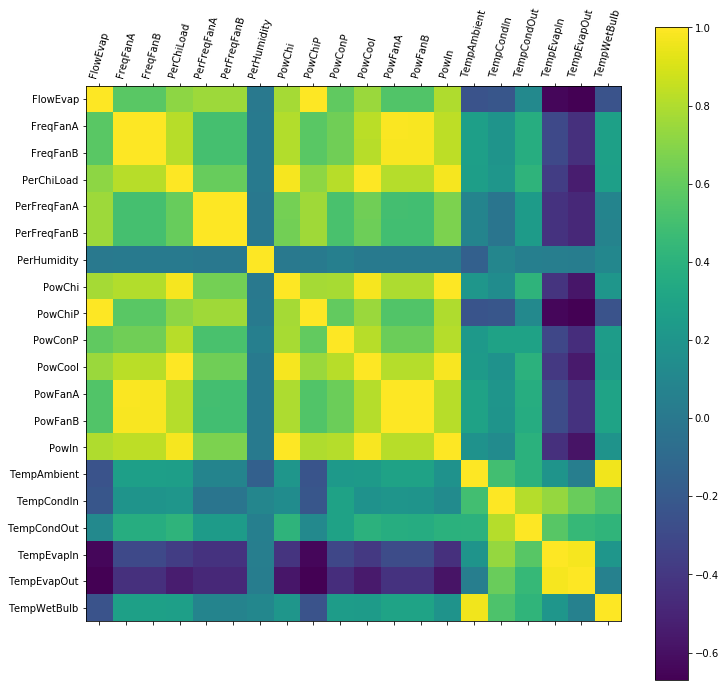

In [75]:
fig, ax = plt.subplots(figsize=(12,12))
correlations = chiller_data.corr()
plt.matshow(correlations,fignum=0)
plt.colorbar()
plt.xticks(np.arange(len(chiller_data.columns)),chiller_data.columns, rotation=75)
plt.yticks(np.arange(len(chiller_data.columns)),chiller_data.columns);

In [82]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlations))

Top Absolute Correlations
PerFreqFanA  PerFreqFanB    1.000000
FlowEvap     PowChiP        0.999999
FreqFanA     FreqFanB       0.999988
PowFanA      PowFanB        0.999982
FreqFanA     PowFanA        0.999590
dtype: float64


So there don't seem to be strong correlations between the chiller usage and the external factors. The only strong correlations are the pieces of the chillers themselves, and it makes sense they would operate in tandem with each other.